# Importing Some Modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder,OneHotEncoder,OrdinalEncoder, StandardScaler
import seaborn as sns
from sklearn.metrics import accuracy_score,confusion_matrix


# Get dataset

In [2]:
df = pd.read_csv('drug200.csv',delimiter = ",")
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


# Exploration of Data

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
Age            200 non-null int64
Sex            200 non-null object
BP             200 non-null object
Cholesterol    200 non-null object
Na_to_K        200 non-null float64
Drug           200 non-null object
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [4]:
df.describe()

,Age,Na_to_K
count,200.000000,200.000000
mean,44.315000,16.084485
std,16.544315,7.223956
min,15.000000,6.269000
25%,31.000000,10.445500
50%,45.000000,13.936500
75%,58.000000,19.380000
max,74.000000,38.247000


In [5]:
p =pd.unique(df['Cholesterol'])
print(p)

['HIGH' 'NORMAL']


In [6]:
df['Drug'].value_counts()

drugY    91
drugX    54
drugA    23
drugB    16
drugC    16
Name: Drug, dtype: int64

In [7]:
df['Drug'].value_counts(normalize = True) 


drugY    0.455
drugX    0.270
drugA    0.115
drugB    0.080
drugC    0.080
Name: Drug, dtype: float64

# Visualization of Data

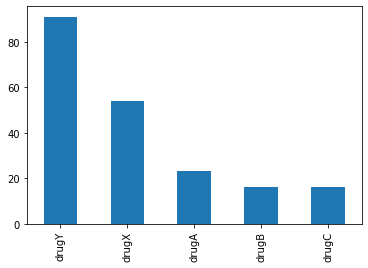

In [8]:
df['Drug'].value_counts().plot.bar()

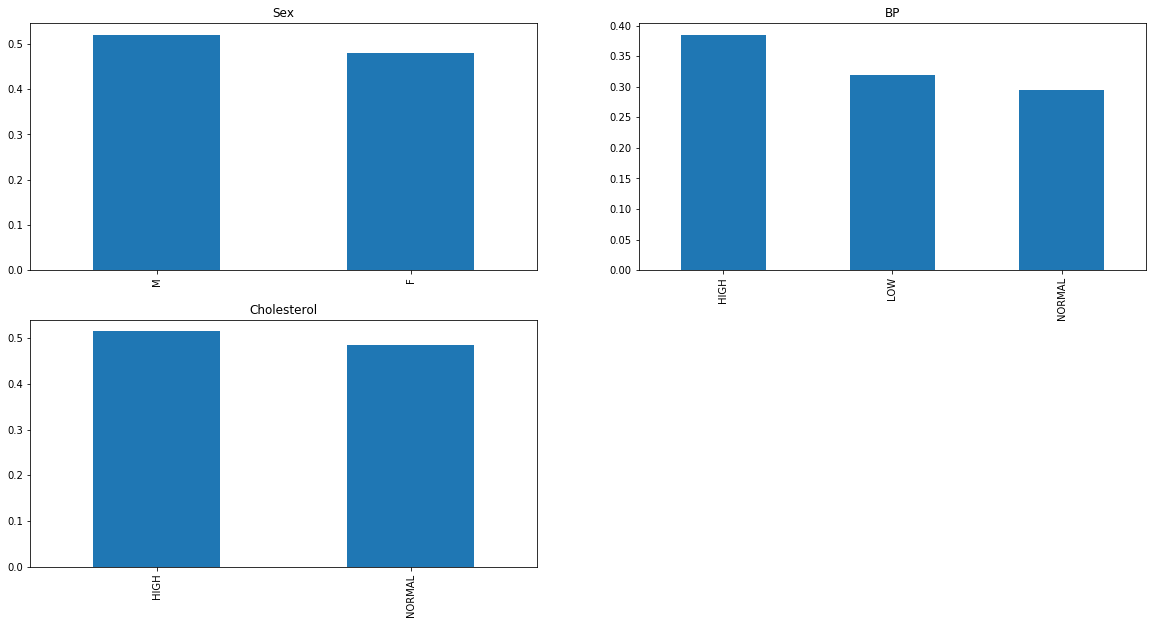

In [9]:
plt.figure(1)
plt.subplot(221)
df['Sex'].value_counts(normalize = True).plot.bar(figsize = (20,10),title = 'Sex')
plt.subplot(222)
df['BP'].value_counts(normalize = True).plot.bar(figsize = (20,10),title = 'BP')
plt.subplot(223)
df['Cholesterol'].value_counts(normalize = True).plot.bar(figsize = (20,10),title = 'Cholesterol')


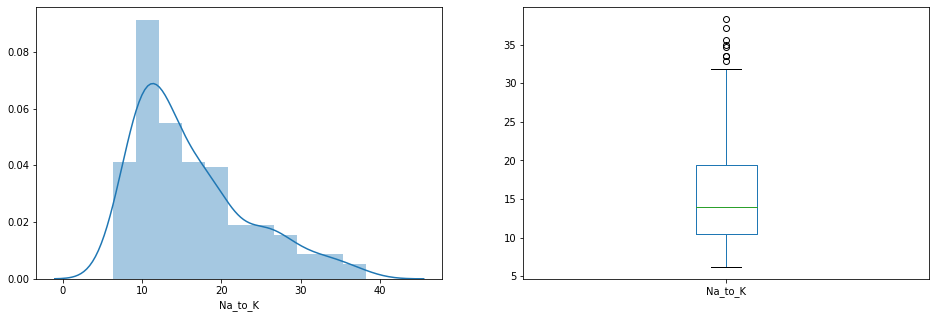

In [10]:
plt.figure(1)
plt.subplot(121)
sns.distplot(df['Na_to_K'])

plt.subplot(122)
df['Na_to_K'].plot.box(figsize = (16,5))

We see a lot of outliers in this variable and the distribution is fairly normal. We will treat the outliers in later sections.

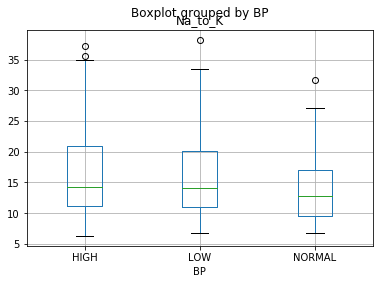

In [11]:
df.boxplot(column = 'Na_to_K',by = 'BP')

In [12]:
df.isnull().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

There is no any null value.

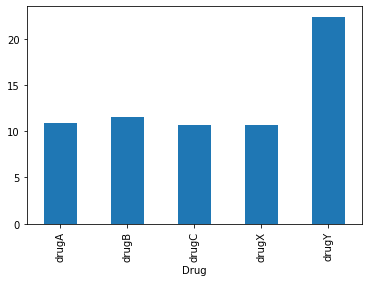

In [13]:

df.groupby('Drug')['Na_to_K'].mean().plot.bar()

# Feature Engineering of Data

In [14]:
x = df.drop(['Drug'],axis = 1)
y = df['Drug'] 

In [15]:
le_BP = LabelEncoder()
le_Cholesterol = LabelEncoder()
p = le_BP.fit(['HIGH','NORMAL','LOW'])
x['le_BP'] = p.transform(x['BP'])
x['le_Cholesterol'] = le_Cholesterol.fit_transform(x['Cholesterol'])

In [16]:
x=pd.get_dummies(x)
x.head()

,Age,Na_to_K,le_BP,le_Cholesterol,Sex_F,Sex_M,BP_HIGH,BP_LOW,BP_NORMAL,Cholesterol_HIGH,Cholesterol_NORMAL
0,23,25.355,0,0,1,0,1,0,0,1,0
1,47,13.093,1,0,0,1,0,1,0,1,0
2,47,10.114,1,0,0,1,0,1,0,1,0
3,28,7.798,2,0,1,0,0,0,1,1,0
4,61,18.043,1,0,1,0,0,1,0,1,0


In [17]:
st = StandardScaler()
x['st_age'] = st.fit_transform(x[['Age']])
x['st_na_to_k'] = st.fit_transform(x[['Na_to_K']])
x.head()

,Age,Na_to_K,le_BP,le_Cholesterol,Sex_F,Sex_M,BP_HIGH,BP_LOW,BP_NORMAL,Cholesterol_HIGH,Cholesterol_NORMAL,st_age,st_na_to_k
0,23,25.355,0,0,1,0,1,0,0,1,0,-1.291591,1.286522
1,47,13.093,1,0,0,1,0,1,0,1,0,0.162699,-0.415145
2,47,10.114,1,0,0,1,0,1,0,1,0,0.162699,-0.828558
3,28,7.798,2,0,1,0,0,0,1,1,0,-0.988614,-1.149963
4,61,18.043,1,0,1,0,0,1,0,1,0,1.011034,0.271794


In [18]:
x = x.drop(['Age','Na_to_K','Cholesterol_NORMAL','BP_NORMAL','Cholesterol_HIGH','BP_LOW','BP_HIGH'],axis = 1)

In [19]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2, random_state = 2)
x_train.shape, x_test.shape

((160, 6), (40, 6))

In [20]:
y_train.shape, y_test.shape

((160,), (40,))

# Build The Decision Tree Model

In [21]:
model = DecisionTreeClassifier()
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
score = accuracy_score(y_pred,y_test)
score

1.0

There is problem with our model that model is overfitted then we are going to optimization process on our model.

# optimize the model by hyperparameters tuning

In [22]:
params = {'max_leaf_nodes': list(range(2, 100)), 'min_samples_split': [2, 3, 4],
         'criterion':['gini','entropy'],'max_depth':list(range(1,10))}
grid_search_cv = GridSearchCV(DecisionTreeClassifier(random_state=42), params, verbose=1, cv=3)
grid_search_cv.fit(x_train, y_train)
grid_search_cv.best_estimator_

Fitting 3 folds for each of 5292 candidates, totalling 15876 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 15876 out of 15876 | elapsed:  3.1min finished
C:\Users\u\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
                       max_features=None, max_leaf_nodes=6,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=42, splitter='best')

# After optimization the model

In [23]:
model = DecisionTreeClassifier(max_depth = 3,max_leaf_nodes = 6,min_samples_split = 2)
model.fit(x_train,y_train)
y_pred = model.predict(x_test)

In [24]:
score = accuracy_score(y_pred,y_test)
score

0.925

# visualize the model

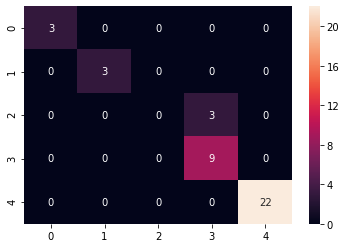

In [25]:
cf_matrix = confusion_matrix(y_test,y_pred)
sns.heatmap(cf_matrix, annot=True)